In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 14})

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) # стаж
X.shape

# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

**1. Подберите скорость обучения (alpha) и количество итераций:**

In [3]:
res = pd.DataFrame(columns=['alpha', 'iteration', 'error'])

n = X.shape[1]

alpha_range = np.arange(1e-3, 1e-1, 1e-3)

# итератор по альфа
for alpha in alpha_range:

    w = np.array([1, 0.5])
    err_prev = np.inf
    err = 0
    iteration = 0
    
    # итератор
    while np.abs(err_prev - err) >= 1e-4:
        
        y_pred_prev = np.dot(w, X)
        err_prev = calc_mse(y, y_pred_prev)
        
        for j in range(w.shape[0]):
            w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred_prev - y)))
        
        y_pred = np.dot(w, X)
        err =  calc_mse(y, y_pred)
        iteration+=1
        
        if err > err_prev:
            break
        
    res = res.append({'alpha': alpha, 'iteration': iteration, 'error': err_prev}, ignore_index=True)
    
    
#print(res)

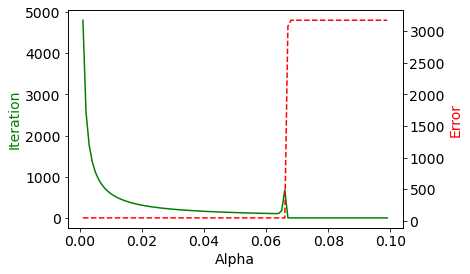

In [4]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(res['alpha'], res['iteration'], 'g-')
ax2.plot(res['alpha'], res['error'], 'r--')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Iteration', color="g")
ax2.set_ylabel('Error', color='r')
plt.show()

In [5]:
# print the best params
print(res.loc[(res['alpha']>0.06) & (res['error'] <= res['error'].quantile(0.05)), :])


    alpha  iteration      error
59  0.060      111.0  45.938232
60  0.061      109.0  45.938245
61  0.062      107.0  45.938265
62  0.063      106.0  45.938193
63  0.064      109.0  45.938206


In [6]:
# the best params
iterations = 106
alpha = 0.063

w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    
    if i % 50 == 0:
        print(i, w, err)

0 [ 7.9426 21.92  ] 3173.15
50 [45.84949979  4.22174419] 47.18727366698796
100 [47.18513502  3.91968328] 45.938864866858154


___
**2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:**

axis = 1

In [7]:
w = np.array([1, 0.5])

for i in range(1000):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    #for j in range(w.shape[0]):
    #    w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    if i % 100 == 0:
        print(i, w, err)

0 [ 7.9426 21.92  ] 3173.15
100 [47.18513502  3.91968328] 45.938864866858154
200 [47.23208912  3.91072422] 45.9375000017779
300 [47.2321428  3.9107143] 45.93750000000001
400 [47.23214286  3.91071429] 45.93750000000002
500 [47.23214286  3.91071429] 45.93749999999999
600 [47.23214286  3.91071429] 45.937500000000014
700 [47.23214286  3.91071429] 45.937500000000014
800 [47.23214286  3.91071429] 45.937500000000014
900 [47.23214286  3.91071429] 45.937500000000014


___
**3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога**

In [8]:
# the best params
iterations = 106
alpha = 0.063

w = np.array([1, 0.5])

while True:
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    
    print(i, w, err)
        
    if(err < 250):
        break
    

999 [ 7.9426 21.92  ] 3173.15
999 [6.9932404  1.66137224] 2645.4891731600005
999 [12.80022656 18.98152631] 2209.6335365645687
999 [12.20145     2.53715629] 1849.215158179052
999 [17.0652949  16.54000856] 1550.8389810855444
999 [16.72896094  3.1898182 ] 1303.5354938940964
999 [20.80852741 14.50882104] 1098.3151452194738
999 [20.66596319  3.66892028] 927.8054612618665
999 [24.09251354 12.81680499] 785.9554054728627
999 [24.09047152  4.01370309] 667.7944240340189
999 [26.97258298 11.40545642] 569.2359780418406
999 [27.07001     4.25516061] 486.9172763420074
999 [29.49759812 10.22663188] 418.06847577051485
999 [29.66305616  4.41770673] 360.4058761534484
999 [31.71067036  9.24067623] 312.0446609395532
999 [31.92028036  4.52051263] 271.42756551182566
999 [33.6498051   8.41489375] 237.26653031348488
